In [9]:
from __future__ import print_function
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import HTML, YouTubeVideo
import matplotlib.patches as patches
from matplotlib.lines import Line2D

### Enter your name below and run the cell:

Individual cells can be run with `Ctrl` + `Enter`

In [ ]:
Name: Katherine 

https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/more-on-regression/v/squared-error-of-regression-line

*Note: All Khan Academy content is available for free at khanacademy.org*

In [ ]:
YouTubeVideo('6OvhLPS7rj4', width=560, height=315)

In [ ]:
YouTubeVideo('mIx2Oj5y9Q8', width=560, height=315)

In [ ]:
YouTubeVideo('f6OnoxctvUk', width=560, height=315)

In [ ]:
YouTubeVideo('u1HhUB3NP8g', width=560, height=315)

In [ ]:
YouTubeVideo('8RSTQl0bQuw', width=560, height=315)

In [ ]:
YouTubeVideo('GAmzwIkGFgE', width=560, height=315)

**The last video is optional**

In [ ]:
YouTubeVideo('ww_yT9ckPWw', width=560, height=315)

In [10]:
lightningbolt = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
_, lightningbolt = cv2.threshold(lightningbolt,150,255,cv2.THRESH_BINARY)
print(lightningbolt.shape)
fig,ax = plt.subplots()
ax.imshow(lightningbolt, cmap='gray');
#check(1)

(215, 209)


In [11]:
np.argwhere

<function argwhere at 0x77f6d17653f0>

In [12]:
bolt = np.argwhere(lightningbolt)
bolt

array([[ 47,  88],
       [ 47,  89],
       [ 47,  90],
       ...,
       [164, 166],
       [164, 167],
       [164, 168]])

## Linear Regression

$$m = \frac{\bar{x}\bar{y} - \overline{xy}}{(\bar{x})^2 - \overline{x^2}}$$

$$b = \bar{y} - m\bar{x}$$

## Question: how can we extract the xs and ys separately from the result of argwhere?

Hint: review numpy slicing by columns and rows

In [ ]:
# TODO
# Your answer here
Slice the first column and have them all be Xs and slice the second column and have them all be Ys

## Question: Why would we want to convert x and y points from int values to floats?

In [ ]:
# TODO
# Your answer here

Floats have a larger range of operations and are able to hold more data

In [13]:
def calculate_regression(points): # input is the result of np.argwhere
    # convert points to float
    points = points.astype(float) #TODO (see astype, https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.astype.html)
    
    xs = points[:, 1] #TODO
    ys = points[:, 0] #TODO
    x_mean = np.mean(xs)
    y_mean = np.mean(ys)

    xy_mean =  np.mean(xs * ys)

    x_squared_mean = np.mean(xs * xs)

    m = (xy_mean - x_mean * y_mean) / (x_squared_mean - x_mean ** 2)
    
    b = y_mean - m * x_mean

    return (m,b)

The intercept we calculated, $b$, may be outside of the pixel space of the image, so we must find two points inside of pixel space, $(x_1, y_1)$ and $(x2, y2)$ which will allow us to plot our regression line on the image. It may be best to choose points on the regression line which also occur on the boundaries/extrema of the image.

In [33]:
def find_inliers(m, b, shape):
    height, width = shape

    # x = 0 (left edge), compute y
    x1 = 0
    y1 = m * x1 + b

    # x = width - 1 (right edge), compute y
    x2 = width
    y2 = m * x2 + b

    # Clip y values to stay within the image bounds
    y1 = max(0, min(height - 1, int(round(y1))))
    y2 = max(0, min(height - 1, int(round(y2))))

    return (x1, x2, y1, y2)


In [34]:
star = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
print(star.shape)

_, star = cv2.threshold(star,125,255,cv2.THRESH_BINARY)
fig,ax = plt.subplots()
ax.imshow(star, cmap='gray');

(146, 125)


In [37]:
m,b = calculate_regression(np.argwhere(star))
x1, x2, y1, y2  = find_inliers(m,b, star.shape)
print(f"{x1}, {x2}, {y1}, {y2}")

0, 125, 72, 67


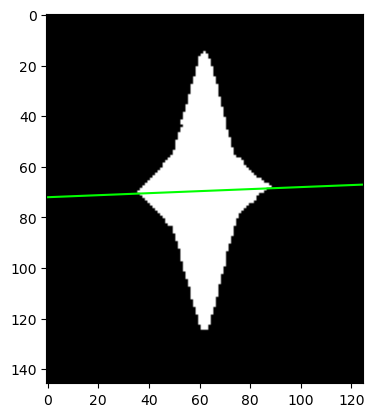

In [38]:
# below is an example of how to draw a random line from (10,25) to (10,55)
# TODO: replace this with the result of find_inliers
# -- pay attention to the directions of the x and y axes 
#    in image space, row-column space, and cartesian space
# Look at the help function for Line2D below

fig,ax = plt.subplots()
ax.imshow(star, cmap='gray');

regression = Line2D([x1, x2],[y1, y2], color='lime')
ax.add_line(regression);
plt.show()

In [39]:
Line2D?

Init signature:
Line2D(
    xdata,
    ydata,
    *,
    linewidth=None,
    linestyle=None,
    color=None,
    gapcolor=None,
    marker=None,
    markersize=None,
    markeredgewidth=None,
    markeredgecolor=None,
    markerfacecolor=None,
    markerfacecoloralt='none',
    fillstyle=None,
    antialiased=None,
    dash_capstyle=None,
    solid_capstyle=None,
    dash_joinstyle=None,
    solid_joinstyle=None,
    pickradius=5,
    drawstyle=None,
    markevery=None,
    **kwargs,
)
Docstring:     
A line - the line can have both a solid linestyle connecting all
the vertices, and a marker at each vertex.  Additionally, the
drawing of the solid line is influenced by the drawstyle, e.g., one
can create "stepped" lines in various styles.
Init docstring:
Create a `.Line2D` instance with *x* and *y* data in sequences of
*xdata*, *ydata*.

Additional keyword arguments are `.Line2D` properties:

Properties:
    agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi va

## TODO

1. Run your linear regression algorithm on the following images. 
2. Plot each of the results. 
3. Include each result in your submitted PDF.

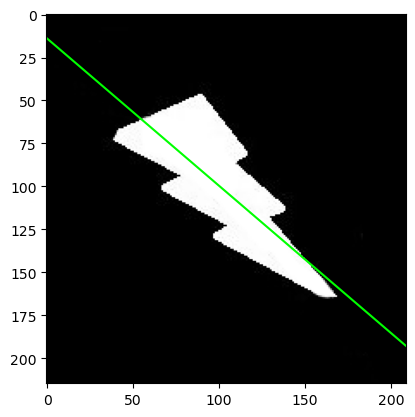

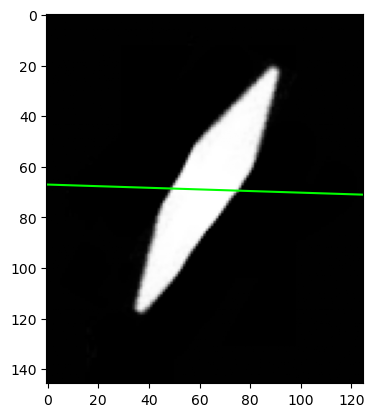

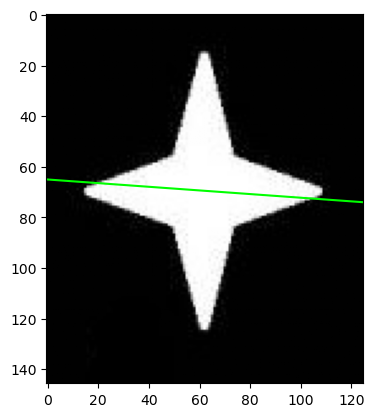

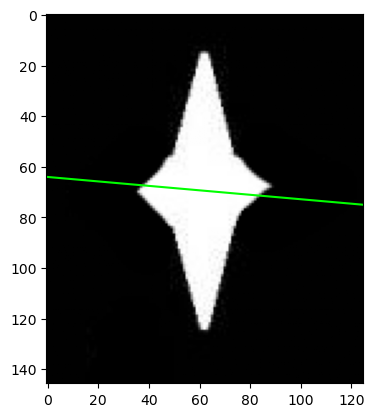

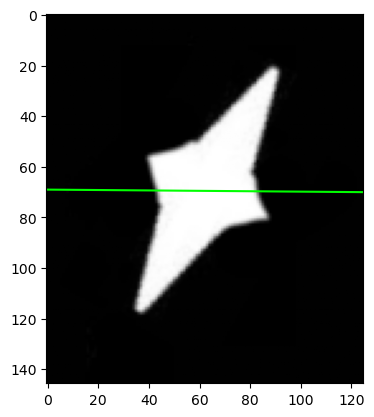

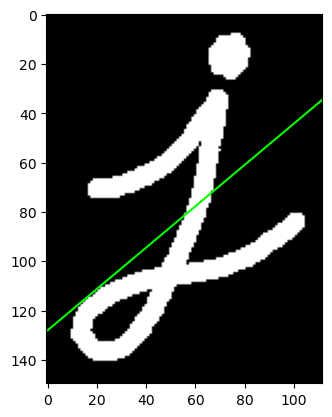

In [42]:
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('shapes/blob.png', cv2.IMREAD_GRAYSCALE)
star               = cv2.imread('shapes/star.png', cv2.IMREAD_GRAYSCALE)
squishedstar       = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
squishedturnedstar = cv2.imread('shapes/squishedturnedstar.png', cv2.IMREAD_GRAYSCALE)
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]



for i in images:
    fig,ax = plt.subplots()
    ax.imshow(i, cmap='gray');

    m,b = calculate_regression(np.argwhere(i))
    x1, x2, y1, y2  = find_inliers(m,b, i.shape)
    
    regression = Line2D([x1, x2],[y1, y2], color='lime')
    ax.add_line(regression);


    plt.show()


## When you are done:

You should have six images with regression lines plotted on top of them.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works` 

## Stretch goal

*Implement a machine learning algorithm!*

**Ran**dom **Sa**mple **C**onsensus, commonly referred to as *RANSAC*, is one of the most widely used machine learning algorithms. In essence, it is a 'guess and check' algorithm. Take a small random sample of your data - two points in this case. Next, define a line through those two points. After doing so, count the number of *inliers*, or points closest to that line (euclidean distance is one way to do this).

https://en.wikipedia.org/wiki/Random_sample_consensus

Implement RANSAC for linear regression, and run it on all of your images.